In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## fetching Data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [4]:
X_valid, X_train = X_train[:5000]/255.0, X_train[5000:]/255.0
Y_valid, Y_train = Y_train[:5000] , Y_train[5000:]

In [5]:
classes = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [6]:
classes[Y_train[0]]

'coat'

## creating model

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-04-25 10:07:21.356363: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-25 10:07:22.145080: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22824 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:02:00.0, compute capability: 7.5


In [8]:
def train_model(optimizer):
    stop_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
    model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
#     history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_valid, Y_valid), callbacks=[stop_cb])
    history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    min_epoch = np.argmin(history.history['val_loss'])
    max_accuracy = max(history.history['val_accuracy'])
    min_loss = min(history.history['val_loss'])
    print("Minimun gained in epoch:", min_epoch)
    print("accuracy:", max_accuracy)
    print("loss:", min_loss)
    return history

### SGD

In [9]:
optimizer = keras.optimizers.SGD(lr=0.001)

/home/gpu/pyenv/py3.8env/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 1.3970 - accuracy: 0.5997 - val_loss: 0.9524 - val_accuracy: 0.7116
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8441 - accuracy: 0.7396 - val_loss: 0.7410 - val_accuracy: 0.7668
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7087 - accuracy: 0.7757 - val_loss: 0.6547 - val_accuracy: 0.7900
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6407 - accuracy: 0.7949 - val_loss: 0.6027 - val_accuracy: 0.8080
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5972 - accuracy: 0.8065 - val_loss: 0.5692 - val_accuracy: 0.8164
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5668 - accuracy: 0.8138 - val_loss: 0.5419 - val_accuracy: 0.8256
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5441 - accuracy: 0.8193 - val_loss: 0.5237 - val_accuracy:

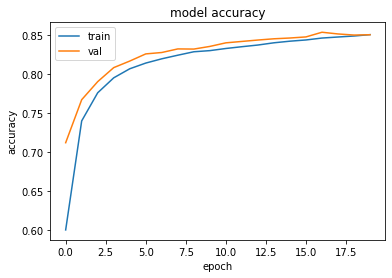

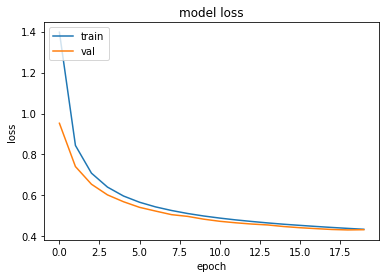

Minimun gained in epoch: 18
accuracy: 0.8533999919891357
loss: 0.4316045045852661


In [10]:
sgd_history = train_model(optimizer)

## SGD with momentum

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4417 - accuracy: 0.8449 - val_loss: 0.4298 - val_accuracy: 0.8528
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4153 - accuracy: 0.8550 - val_loss: 0.4056 - val_accuracy: 0.8612
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3957 - accuracy: 0.8614 - val_loss: 0.3987 - val_accuracy: 0.8606
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3797 - accuracy: 0.8674 - val_loss: 0.3690 - val_accuracy: 0.8718
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3657 - accuracy: 0.8718 - val_loss: 0.3635 - val_accuracy: 0.8742
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3556 - accuracy: 0.8735 - val_loss: 0.3638 - val_accuracy: 0.8730
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3428 - accuracy: 0.8789 - val_loss: 0.3504 - val_accuracy:

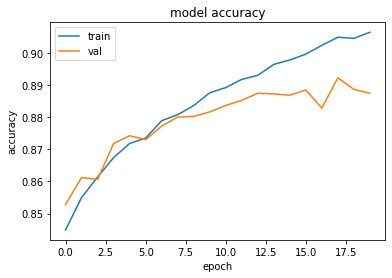

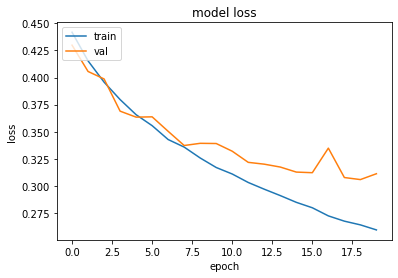

Minimun gained in epoch: 18
accuracy: 0.8921999931335449
loss: 0.3059265911579132


In [11]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
sgd_momentum = train_model(optimizer)

## SGD with Nesterov Accelerated Gradient

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2511 - accuracy: 0.9104 - val_loss: 0.3033 - val_accuracy: 0.8916
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2471 - accuracy: 0.9116 - val_loss: 0.3011 - val_accuracy: 0.8918
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2435 - accuracy: 0.9130 - val_loss: 0.3082 - val_accuracy: 0.8908
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2383 - accuracy: 0.9150 - val_loss: 0.3015 - val_accuracy: 0.8892
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2352 - accuracy: 0.9155 - val_loss: 0.2951 - val_accuracy: 0.8948
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2304 - accuracy: 0.9180 - val_loss: 0.2995 - val_accuracy: 0.8890
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2263 - accuracy: 0.9179 - val_loss: 0.2958 - val_accuracy:

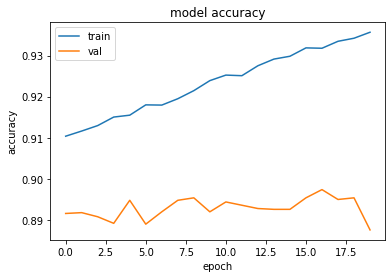

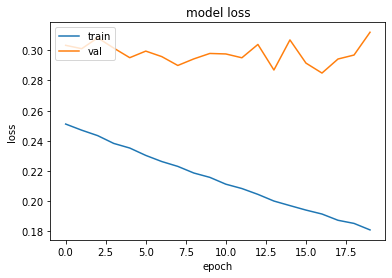

Minimun gained in epoch: 16
accuracy: 0.8974000215530396
loss: 0.28491002321243286


In [12]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9,nesterov=True)
sgd_nesterov = train_model(optimizer)

## AdaGrad

In [13]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1601 - accuracy: 0.9462 - val_loss: 0.2852 - val_accuracy: 0.8986
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1559 - accuracy: 0.9475 - val_loss: 0.2834 - val_accuracy: 0.8994
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1541 - accuracy: 0.9483 - val_loss: 0.2816 - val_accuracy: 0.9008
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1527 - accuracy: 0.9489 - val_loss: 0.2829 - val_accuracy: 0.8996
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1514 - accuracy: 0.9498 - val_loss: 0.2818 - val_accuracy: 0.9014
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1505 - accuracy: 0.9502 - val_loss: 0.2807 - val_accuracy: 0.9000
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1497 - accuracy: 0.9497 - val_loss: 0.2809 - val_accuracy:

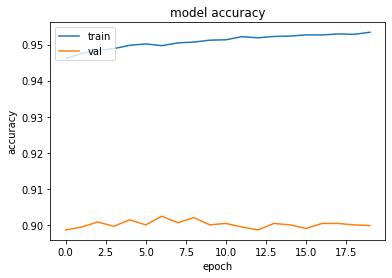

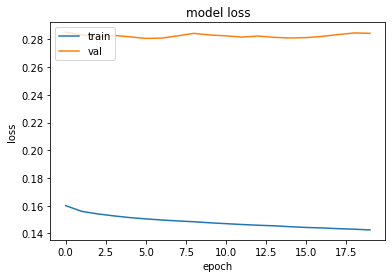

Minimun gained in epoch: 5
accuracy: 0.902400016784668
loss: 0.28071269392967224


In [14]:
adagrad = train_model(optimizer)

## RMSProp

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4245 - accuracy: 0.8499 - val_loss: 0.4092 - val_accuracy: 0.8534
Epoch 2/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3670 - accuracy: 0.8699 - val_loss: 0.4238 - val_accuracy: 0.8528
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3474 - accuracy: 0.8786 - val_loss: 0.3787 - val_accuracy: 0.8832
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3387 - accuracy: 0.8844 - val_loss: 0.3744 - val_accuracy: 0.8816
Epoch 5/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3301 - accuracy: 0.8865 - val_loss: 0.4365 - val_accuracy: 0.8768
Epoch 6/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3262 - accuracy: 0.8897 - val_loss: 0.4310 - val_accuracy: 0.8780
Epoch 7/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3204 - accuracy: 0.8914 - val_loss: 0.4482 - val_accuracy:

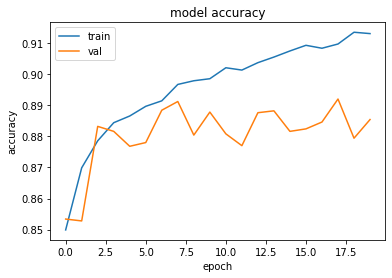

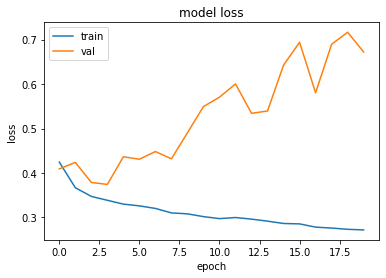

Minimun gained in epoch: 3
accuracy: 0.8920000195503235
loss: 0.3743523061275482


In [15]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
rmsprop = train_model(optimizer)

## ADAM

/home/gpu/pyenv/py3.8env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2811 - accuracy: 0.9098 - val_loss: 0.5010 - val_accuracy: 0.8864
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2592 - accuracy: 0.9117 - val_loss: 0.5064 - val_accuracy: 0.8894
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2395 - accuracy: 0.9156 - val_loss: 0.4988 - val_accuracy: 0.8828
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2303 - accuracy: 0.9171 - val_loss: 0.4044 - val_accuracy: 0.8974
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2253 - accuracy: 0.9197 - val_loss: 0.4077 - val_accuracy: 0.8948
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2248 - accuracy: 0.9204 - val_loss: 0.4175 - val_accuracy: 0.8858
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2097 - accuracy: 0.9227 - val_loss: 0.4016 - val_accuracy:

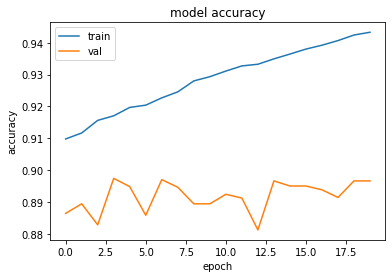

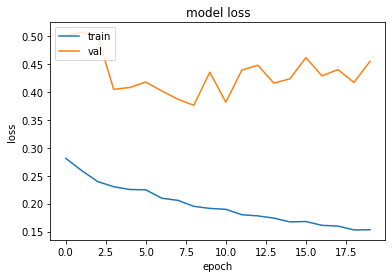

Minimun gained in epoch: 8
accuracy: 0.8974000215530396
loss: 0.3758538067340851


In [16]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
adam = train_model(optimizer)

## Adamax

/home/gpu/pyenv/py3.8env/lib/python3.8/site-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9598 - val_loss: 0.4758 - val_accuracy: 0.9044
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1034 - accuracy: 0.9606 - val_loss: 0.4760 - val_accuracy: 0.9064
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1003 - accuracy: 0.9623 - val_loss: 0.5041 - val_accuracy: 0.9044
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0975 - accuracy: 0.9633 - val_loss: 0.5095 - val_accuracy: 0.9052
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0957 - accuracy: 0.9651 - val_loss: 0.5358 - val_accuracy: 0.8988
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0942 - accuracy: 0.9647 - val_loss: 0.5441 - val_accuracy: 0.9044
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0919 - accuracy: 0.9655 - val_loss: 0.5527 - val_accuracy:

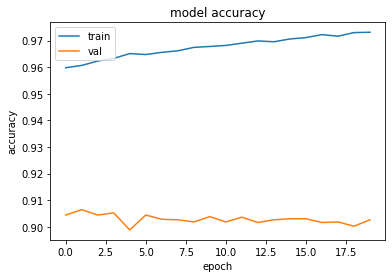

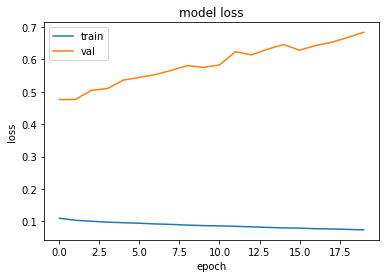

Minimun gained in epoch: 0
accuracy: 0.9064000248908997
loss: 0.4757564067840576


In [17]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
adamax = train_model(optimizer)

## Nadam

/home/gpu/pyenv/py3.8env/lib/python3.8/site-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


Epoch 1/20
1719/1719 [==============================] - 10s 5ms/step - loss: 0.1340 - accuracy: 0.9517 - val_loss: 0.5356 - val_accuracy: 0.8974
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1300 - accuracy: 0.9517 - val_loss: 0.6059 - val_accuracy: 0.8948
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1316 - accuracy: 0.9518 - val_loss: 0.5224 - val_accuracy: 0.8928
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1251 - accuracy: 0.9538 - val_loss: 0.4972 - val_accuracy: 0.8922
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1221 - accuracy: 0.9538 - val_loss: 0.5147 - val_accuracy: 0.8972
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1242 - accuracy: 0.9530 - val_loss: 0.5692 - val_accuracy: 0.8934
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1213 - accuracy: 0.9540 - val_loss: 0.5439 - val_accuracy

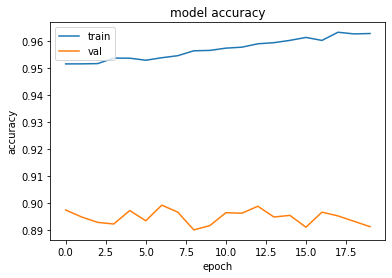

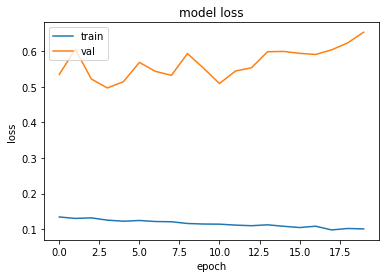

Minimun gained in epoch: 3
accuracy: 0.8992000222206116
loss: 0.49719536304473877


In [18]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
nadam= train_model(optimizer)

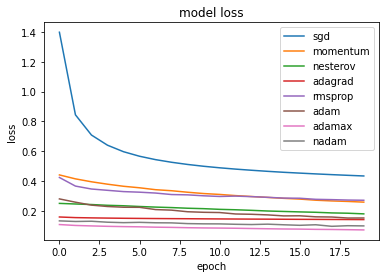

In [19]:
plt.plot(sgd_history.history['loss'])
plt.plot(sgd_momentum.history['loss'])
plt.plot(sgd_nesterov.history['loss'])
plt.plot(adagrad.history['loss'])
plt.plot(rmsprop.history['loss'])
plt.plot(adam.history['loss'])
plt.plot(adamax.history['loss'])
plt.plot(nadam.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sgd', 'momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam', 'adamax', 'nadam'], loc='upper right')
plt.show()